In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# run this command to allow more data to be displayed than default
pd.set_option('display.max_rows', 200)

/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import the cleaned csv
cleaned = pd.read_csv('Data/cleaned_transport.csv')
cleaned

,MSOA,Bus_stops,Train_stations,metro_stations,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,taxi_perc,...,bicycle_perc,on_foot_perc,other_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail,car_perc
0,E02000001,168.0,8.0,12.0,30.604333,14.649948,18.390805,5.433647,5.538140,0.898642,...,5.078370,45.642633,0.856844,107.138221,17.438187,230.859581,18.775911,106.993596,13.236389,3.051202
1,E02000002,20.0,NaN,NaN,62.403244,6.400966,15.660225,8.212560,14.734300,0.805153,...,1.328502,4.669887,0.483092,113.749868,10.130105,274.805137,30.271190,123.991276,27.759498,46.819646
2,E02000003,18.0,NaN,NaN,68.805425,6.895792,12.778145,19.850187,10.619079,0.484688,...,0.881251,5.904384,0.462657,113.586928,9.482660,274.225431,30.527590,122.518744,27.696000,41.440846
3,E02000004,13.0,NaN,NaN,76.013805,6.368090,10.146956,13.750875,9.972008,0.664801,...,1.329601,6.752974,0.454864,116.934828,9.912072,277.881534,25.194931,124.616367,25.285777,49.475157
4,E02000005,10.0,NaN,NaN,66.069746,6.286509,12.406120,12.294854,15.076495,0.528512,...,1.585535,5.535466,0.166898,114.024047,9.027028,274.648700,28.070900,122.390085,26.318473,45.201669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,68.0,NaN,NaN,78.594455,8.073744,0.021191,1.292647,3.390549,1.038356,...,2.564103,9.557110,0.360246,154.988475,10.580205,378.175582,19.372429,184.373645,186.314590,72.981564
7197,W02000420,107.0,NaN,NaN,89.725659,13.338290,0.148699,0.832714,3.568773,0.193309,...,1.501859,4.014870,0.550186,131.157535,14.892468,321.595111,24.412720,172.831765,132.213617,75.375465
7198,W02000421,130.0,NaN,7.0,89.238114,24.655573,0.107354,0.339953,1.789229,0.178923,...,0.984076,4.007873,0.429415,183.039419,20.938017,366.770748,39.131078,281.459917,220.757360,66.935051
7199,W02000422,52.0,NaN,NaN,82.430213,6.057363,0.064212,4.965753,8.005137,0.535103,...,3.381849,18.857021,0.470890,146.519709,13.193340,319.994342,18.133359,191.265110,158.132943,57.448630


In [3]:
# replace all NA values with 0
cleaned.fillna(0, inplace=True)

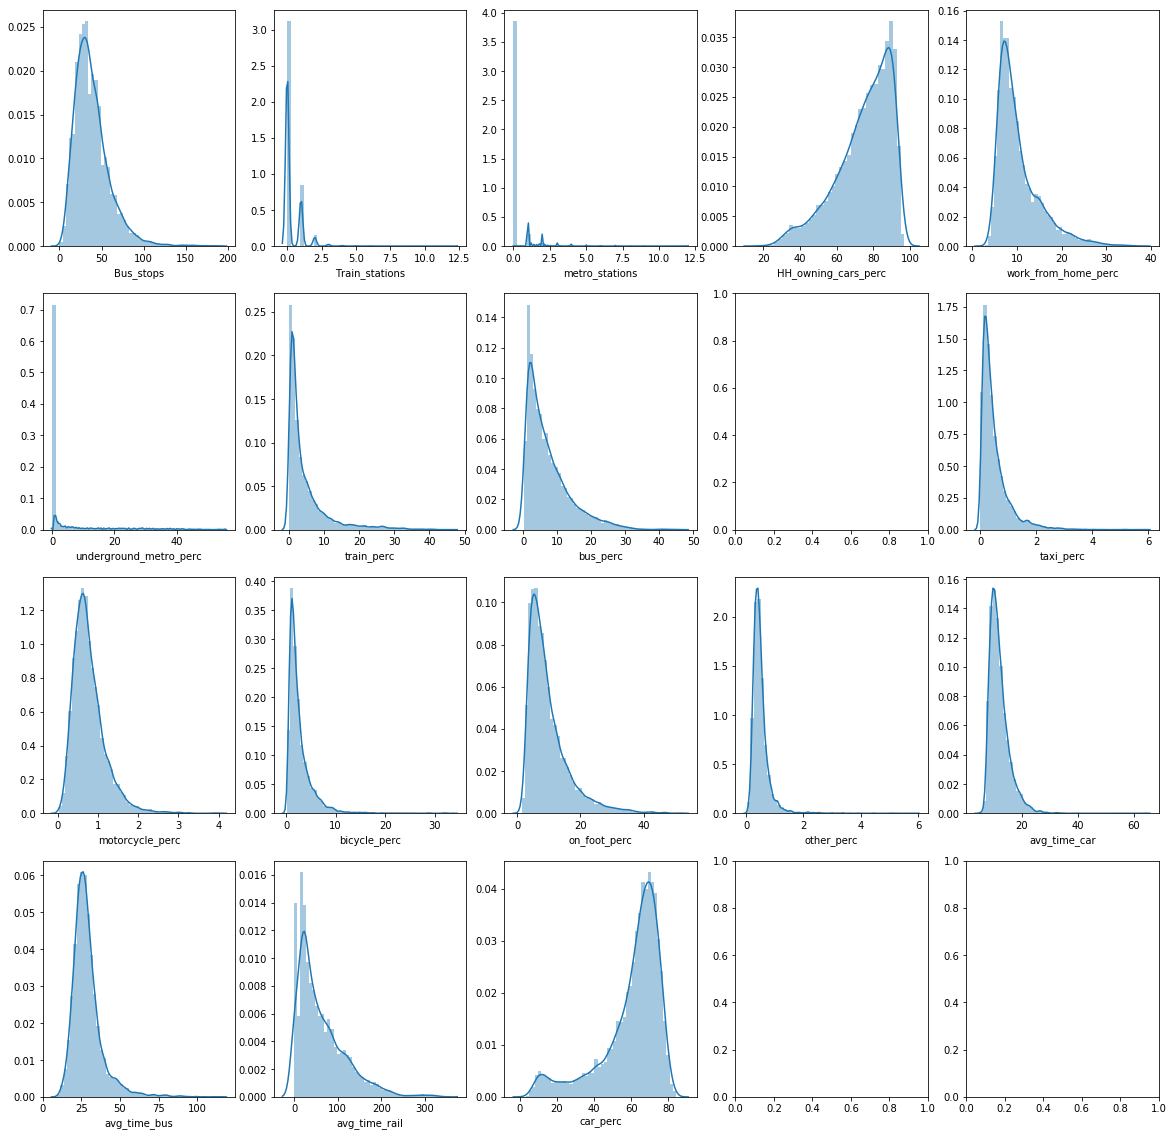

In [4]:
# plot 
f, axes = plt.subplots(4,5, figsize = (20,20), sharex=False)


sns.distplot(cleaned["Bus_stops"], ax=axes[0,0])
sns.distplot(cleaned["Train_stations"], ax=axes[0,1])
sns.distplot(cleaned["metro_stations"], ax=axes[0,2])
sns.distplot(cleaned["HH_owning_cars_perc"], ax=axes[0,3])
sns.distplot(cleaned["work_from_home_perc"], ax=axes[0,4])
sns.distplot(cleaned["underground_metro_perc"], ax=axes[1,0])
sns.distplot(cleaned["train_perc"], ax=axes[1,1])
sns.distplot(cleaned["bus_perc"], ax=axes[1,2])
sns.distplot(cleaned["taxi_perc"], ax=axes[1,4])
sns.distplot(cleaned["motorcycle_perc"], ax=axes[2,0])
sns.distplot(cleaned["bicycle_perc"], ax=axes[2,1])
sns.distplot(cleaned["on_foot_perc"], ax=axes[2,2])
sns.distplot(cleaned["other_perc"], ax=axes[2,3])
sns.distplot(cleaned["avg_time_car"], ax=axes[2,4])
sns.distplot(cleaned["avg_time_bus"], ax=axes[3,0])
sns.distplot(cleaned["avg_time_rail"], ax=axes[3,1])
sns.distplot(cleaned["car_perc"], ax=axes[3,2])

In [6]:
# remove MSOA column because it is a string
cleaned_for_boxcox = cleaned.drop(['MSOA'], axis=1)
cleaned_for_boxcox

,Bus_stops,Train_stations,metro_stations,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,taxi_perc,motorcycle_perc,bicycle_perc,on_foot_perc,other_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail,car_perc
0,168.0,8.0,12.0,30.604333,14.649948,18.390805,5.433647,5.538140,0.898642,0.459770,5.078370,45.642633,0.856844,107.138221,17.438187,230.859581,18.775911,106.993596,13.236389,3.051202
1,20.0,0.0,0.0,62.403244,6.400966,15.660225,8.212560,14.734300,0.805153,0.885668,1.328502,4.669887,0.483092,113.749868,10.130105,274.805137,30.271190,123.991276,27.759498,46.819646
2,18.0,0.0,0.0,68.805425,6.895792,12.778145,19.850187,10.619079,0.484688,0.682970,0.881251,5.904384,0.462657,113.586928,9.482660,274.225431,30.527590,122.518744,27.696000,41.440846
3,13.0,0.0,0.0,76.013805,6.368090,10.146956,13.750875,9.972008,0.664801,1.084675,1.329601,6.752974,0.454864,116.934828,9.912072,277.881534,25.194931,124.616367,25.285777,49.475157
4,10.0,0.0,0.0,66.069746,6.286509,12.406120,12.294854,15.076495,0.528512,0.917942,1.585535,5.535466,0.166898,114.024047,9.027028,274.648700,28.070900,122.390085,26.318473,45.201669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,68.0,0.0,0.0,78.594455,8.073744,0.021191,1.292647,3.390549,1.038356,0.720492,2.564103,9.557110,0.360246,154.988475,10.580205,378.175582,19.372429,184.373645,186.314590,72.981564
7197,107.0,0.0,0.0,89.725659,13.338290,0.148699,0.832714,3.568773,0.193309,0.475836,1.501859,4.014870,0.550186,131.157535,14.892468,321.595111,24.412720,172.831765,132.213617,75.375465
7198,130.0,0.0,7.0,89.238114,24.655573,0.107354,0.339953,1.789229,0.178923,0.572553,0.984076,4.007873,0.429415,183.039419,20.938017,366.770748,39.131078,281.459917,220.757360,66.935051
7199,52.0,0.0,0.0,82.430213,6.057363,0.064212,4.965753,8.005137,0.535103,0.214041,3.381849,18.857021,0.470890,146.519709,13.193340,319.994342,18.133359,191.265110,158.132943,57.448630


In [7]:
from scipy import stats

test = stats.boxcox(cleaned_for_boxcox)
test

ValueError: Data must be positive.